In [2]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 11.3 MB/s eta 0:00:14
   ---------------------------------------- 1.3/150.0 MB 11.3 MB/s eta 0:00:14
   ---------------------------------------- 1.8/150.0 MB 3.6 MB/s eta 0:00:42
   ---------------------------------------- 1.8/150.0 MB 3.6 MB/s eta 0:00:42
    --------------------------------------- 2.1/150.0 MB 2.2 MB/s eta 0:01:08
    --------------------------------------- 2.4/150.0 MB 1.8 MB/s eta 0:01:22
    --------------------------------------- 2.4/150.0 MB 1.8 MB/s eta 0:01:22
    --------------------------------------- 2.9/150.0 MB 1.7 MB/s eta 0:01:27
    --------------------------------------- 3.7/150.0 MB 1.9 MB/s eta 0:01:16
   - -------------------------------------- 4.2/150.0 MB 2.0 MB/s eta 0:01:13
   - -------------------------------------- 4.2/150.0 MB 2.0 MB/s eta 0:01:13
   - -------------------------------------- 4.5/150.0 MB 1.8 MB/s eta


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\jecroisp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [24]:
#Load Preprocessed Data
df = pd.read_csv('../data/preprocessed_data.csv')
df = df.drop(columns = ['Unnamed: 0'])

In [11]:
#Feature and target variables
X = df.drop(columns=['Price'])
y = df['Price']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}


In [14]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R²': r2}
    print(f"{name} Model:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  R² Score: {r2:.2f}\n")


Random Forest Model:
  Mean Squared Error: 58834182619.78
  Mean Absolute Error: 100743.28
  R² Score: 0.78

Gradient Boosting Model:
  Mean Squared Error: 78378284055.06
  Mean Absolute Error: 134582.40
  R² Score: 0.71

XGBoost Model:
  Mean Squared Error: 50372120144.28
  Mean Absolute Error: 104474.77
  R² Score: 0.81



In [15]:
rf = models['Random Forest']
importances = rf.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

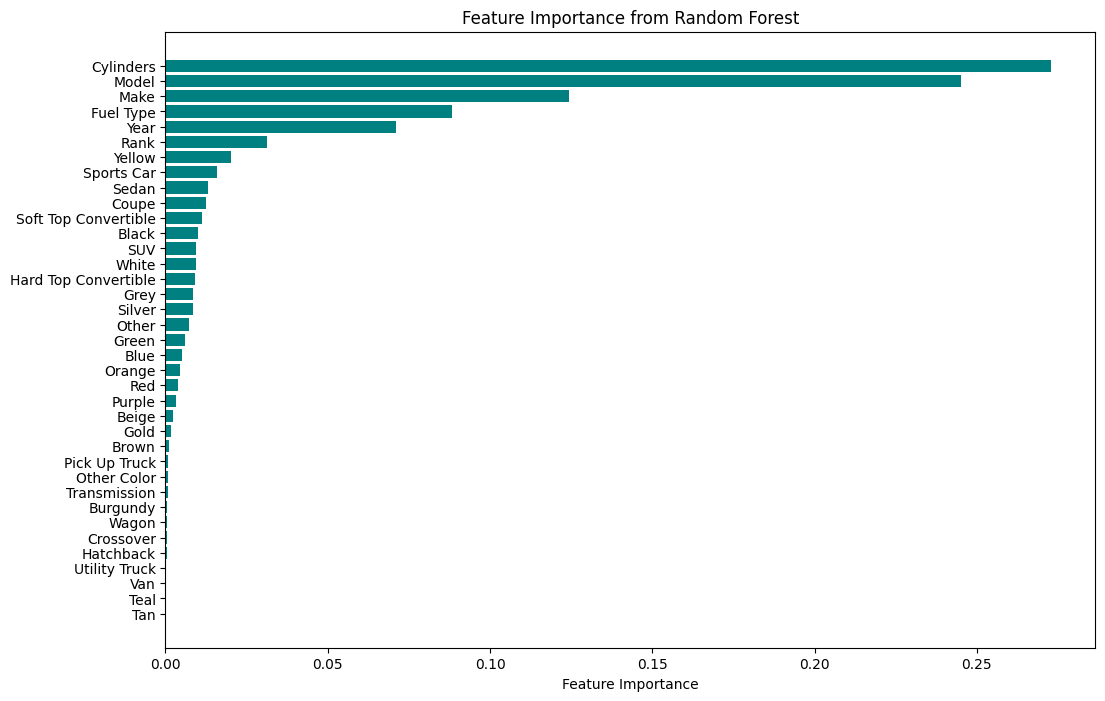

In [16]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


## Conclusions and Insights

### Feature Importance Analysis
The feature importance analysis using the **Random Forest Regressor** revealed the following key insights:

1. **Top Contributing Features:**
   - The most important features in predicting car prices are **Cylinders**, **Model**, **Make**, and **Fuel Type**.
   - These features have a significantly higher impact compared to others, indicating that the engine configuration and car specifications are primary determinants of pricing.

2. **Moderately Important Features:**
   - Features like **Year**, **Rank**, and **Body Types** (e.g., Sports Car, Sedan) also show moderate importance.
   - This suggests that recent models and higher-ranked cars tend to influence price positively.

3. **Least Contributing Features:**
   - Various color attributes (e.g., **Teal**, **Tan**, **Beige**) and some vehicle types (e.g., **Van**, **Utility Truck**) have minimal impact.
   - This indicates that aesthetic aspects and less common car types do not significantly affect pricing.

### Implications
Understanding feature importance helps in refining the dataset by focusing on the most impactful variables, potentially improving model accuracy and reducing computation time. Additionally, this insight can guide car dealerships and resellers in highlighting key attributes when presenting vehicles for sale.

### Next Steps
- Conduct deeper hyperparameter tuning for the models to optimize prediction accuracy.
- Explore using **feature selection techniques** to reduce dimensionality and enhance model performance.
- Test ensemble models that combine predictions from multiple algorithms for improved robustness.



In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

Hyperparameter tuning for RandomForestRegressor

In [27]:
param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [10, 20, None],
'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid_search.best_params_)

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [28]:
model = RandomForestRegressor(random_state=42)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", list(selected_features))

Selected Features by RFE: ['Make', 'Model', 'Year', 'Cylinders', 'Fuel Type', 'Rank', 'Coupe', 'Sedan', 'Black', 'Yellow']


In [29]:
stacking = StackingRegressor(
estimators=[
('rf', RandomForestRegressor(random_state=42)),
('gb', GradientBoostingRegressor(random_state=42)),
('xgb', XGBRegressor(random_state=42))
],
final_estimator=LinearRegression()
)
voting = VotingRegressor(
estimators=[
('rf', RandomForestRegressor(random_state=42)),
('gb', GradientBoostingRegressor(random_state=42)),
('xgb', XGBRegressor(random_state=42))
]
)

In [30]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
    return y_pred

In [31]:
print("\nStacking Regressor Performance:")
y_pred_stacking = evaluate_model(stacking, X_train, y_train, X_test, y_test)

print("\nVoting Regressor Performance:")
y_pred_voting = evaluate_model(voting, X_train, y_train, X_test, y_test)


Stacking Regressor Performance:
MSE: 52144344448.79, MAE: 103263.41, R²: 0.80

Voting Regressor Performance:
MSE: 52622304972.69, MAE: 105718.01, R²: 0.80


In [32]:
print("\nCross-Validation (Random Forest):")
scores = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores)
print("Average R² Score:", np.mean(scores))


Cross-Validation (Random Forest):
Cross-Validation R² Scores: [0.689489   0.74732232 0.73596978 0.72030234 0.77627396]
Average R² Score: 0.7338714799410839


In [33]:
errors = np.abs(y_test - y_pred_stacking)
error_df = pd.DataFrame({
'Actual': y_test,
'Predicted': y_pred_stacking,
'Error': errors
})
error_df = error_df.sort_values(by='Error', ascending=False)
print("\nTop 10 High-Error Predictions:\n", error_df.head(10))


Top 10 High-Error Predictions:
         Actual     Predicted         Error
7966  14686975  9.168654e+06  5.518321e+06
3728  10308926  5.380106e+06  4.928820e+06
5165    689130  2.584852e+06  1.895722e+06
2248   2749174  1.165381e+06  1.583793e+06
6369   2689069  1.160123e+06  1.528946e+06
7516   1237642  2.676782e+06  1.439140e+06
4830   1091863  2.500971e+06  1.409108e+06
4110    423566  1.809756e+06  1.386190e+06
20     4197282  2.815774e+06  1.381508e+06
866    4002508  2.890146e+06  1.112362e+06


In [34]:
import joblib

In [35]:
best_rf_model = grid_search.best_estimator_
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
print("Best Random Forest model saved as 'best_random_forest_model.pkl'")

# Saving the stacking and voting regressors
joblib.dump(stacking, 'stacking_regressor.pkl')
print("Stacking Regressor model saved as 'stacking_regressor.pkl'")

joblib.dump(voting, 'voting_regressor.pkl')
print("Voting Regressor model saved as 'voting_regressor.pkl'")

# Loading the models (example)
best_rf_loaded = joblib.load('best_random_forest_model.pkl')
print("Loaded Best Random Forest model:", best_rf_loaded)

stacking_loaded = joblib.load('stacking_regressor.pkl')
print("Loaded Stacking Regressor:", stacking_loaded)

voting_loaded = joblib.load('voting_regressor.pkl')
print("Loaded Voting Regressor:", voting_loaded)

Best Random Forest model saved as 'best_random_forest_model.pkl'
Stacking Regressor model saved as 'stacking_regressor.pkl'
Voting Regressor model saved as 'voting_regressor.pkl'
Loaded Best Random Forest model: RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=200,
                      random_state=42)
Loaded Stacking Regressor: StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=N

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Calculate accuracy scores for each model
def evaluate_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, np.round(y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    return y_pred

In [42]:
# Prediction vs Actual Plot
def plot_prediction_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(f'Prediction vs Actual for {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

In [44]:
# Residual Plot
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

In [45]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


Stacking Regressor Performance:
MSE: 52144344448.79, MAE: 103263.41, R²: 0.80


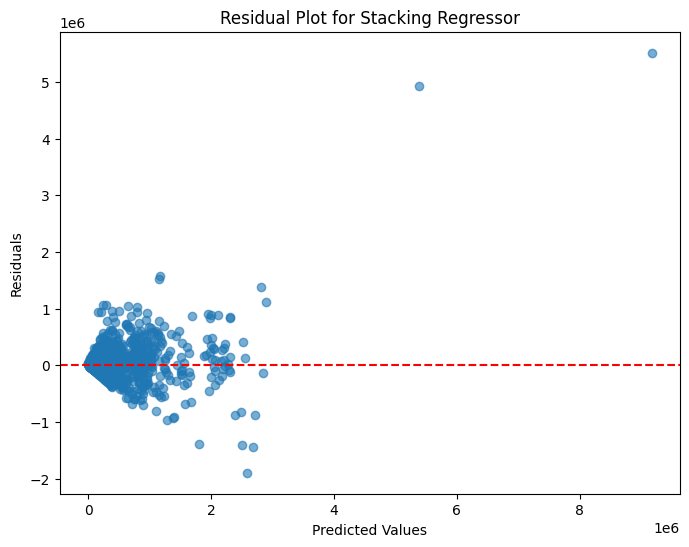

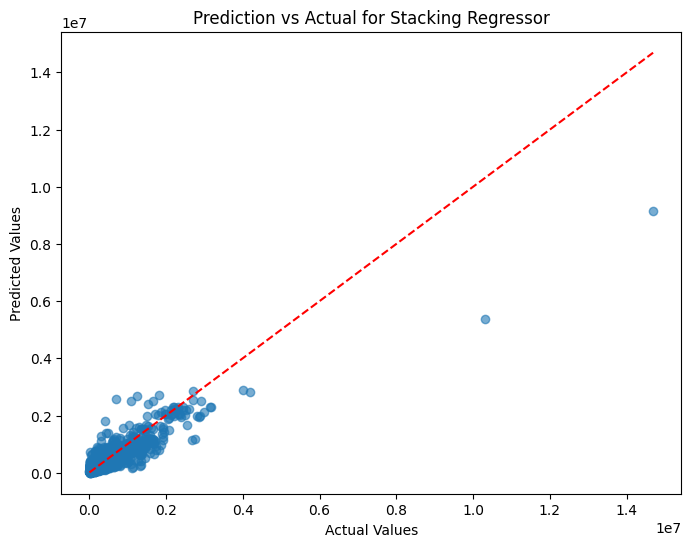

In [46]:
# Evaluate and plot for Stacking Regressor
print("\nStacking Regressor Performance:")
y_pred_stacking = evaluate_model(stacking, X_train, y_train, X_test, y_test)
plot_residuals(y_test, y_pred_stacking, "Stacking Regressor")
plot_prediction_vs_actual(y_test, y_pred_stacking, "Stacking Regressor")


Voting Regressor Performance:
MSE: 52622304972.69, MAE: 105718.01, R²: 0.80


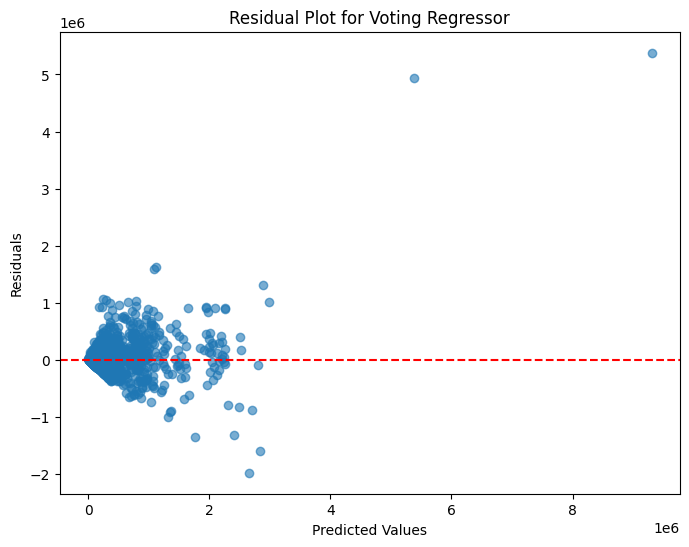

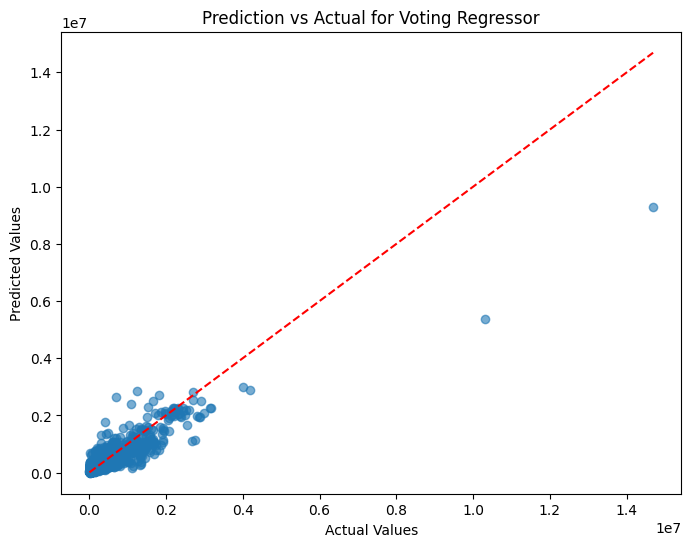

In [47]:
# Evaluate and plot for Voting Regressor
print("\nVoting Regressor Performance:")
y_pred_voting = evaluate_model(voting, X_train, y_train, X_test, y_test)
plot_residuals(y_test, y_pred_voting, "Voting Regressor")
plot_prediction_vs_actual(y_test, y_pred_voting, "Voting Regressor")